## Problem statement : Youtbe video summrizer / querry solver (streamlit or chrome plugin)
### Flow : see 4_rag/5_what_is_Rag last photo 


# Start 
- Tasks 1 indexing:
    - 1.1 Youtube ki video ki transcript uthani hy sentenc by sentence hoti hy (YT api or langchain YTloader kch bhi use  krlo)
    - 1.2 text split 
    - 1.3 embedding and vector store
- Task 2 Reteriver :
- Task 3 Augmentation :
- Task 4 Generation :


#### 1.1 load document

In [1]:
from youtube_transcript_api import YouTubeTranscriptApi,TranscriptsDisabled
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.vectorstores import FAISS
from langchain.prompts import PromptTemplate

In [10]:
video_id = "Gfr50f6ZBvo"
try: 
    transcript_list  =  YouTubeTranscriptApi.get_transcript(video_id,languages=["en"])
    transcipt  =  " ".join(chunk["text"]  for chunk in transcript_list)
    print(transcipt)
except:
    print("NO Transcipt ")

the following is a conversation with demus hasabis ceo and co-founder of deepmind a company that has published and builds some of the most incredible artificial intelligence systems in the history of computing including alfred zero that learned all by itself to play the game of gold better than any human in the world and alpha fold two that solved protein folding both tasks considered nearly impossible for a very long time demus is widely considered to be one of the most brilliant and impactful humans in the history of artificial intelligence and science and engineering in general this was truly an honor and a pleasure for me to finally sit down with him for this conversation and i'm sure we will talk many times again in the future this is the lex friedman podcast to support it please check out our sponsors in the description and now dear friends here's demis hassabis let's start with a bit of a personal question am i an ai program you wrote to interview people until i get good enough 

### 1.2 Text splitter

In [11]:
splitter = RecursiveCharacterTextSplitter(chunk_size  = 1000,chunk_overlap = 200)
chunk = splitter.create_documents([transcipt])
chunk

[Document(metadata={}, page_content="the following is a conversation with demus hasabis ceo and co-founder of deepmind a company that has published and builds some of the most incredible artificial intelligence systems in the history of computing including alfred zero that learned all by itself to play the game of gold better than any human in the world and alpha fold two that solved protein folding both tasks considered nearly impossible for a very long time demus is widely considered to be one of the most brilliant and impactful humans in the history of artificial intelligence and science and engineering in general this was truly an honor and a pleasure for me to finally sit down with him for this conversation and i'm sure we will talk many times again in the future this is the lex friedman podcast to support it please check out our sponsors in the description and now dear friends here's demis hassabis let's start with a bit of a personal question am i an ai program you wrote to inte

#### 1.3 Embedding and vector store

In [12]:
embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
vectore_store = FAISS.from_documents(chunk,embeddings)


In [13]:
vectore_store.index_to_docstore_id

{0: 'f2e13452-6e29-4126-8172-2a8496b57a88',
 1: '46d4f4f5-2f00-442b-8e21-9fa7dfafe2e4',
 2: 'f1d895e8-3664-4932-8910-0e8e2890ccb0',
 3: '6e2492ba-6f69-45f9-b2a5-d88644e5c7f2',
 4: '5e109d7a-ddad-4eb6-afcd-26bb4df3dec4',
 5: 'e03ae707-a691-4dd7-85cb-03771e2d5833',
 6: '81df3f22-ae76-4d98-aa7f-0628303ae849',
 7: '8d4cd5e6-baa0-48fa-9fe2-e3d12d6973e4',
 8: 'b1e52b1d-bdef-48fd-936b-2aa5975a2a23',
 9: 'ea58f60f-666d-4ccc-a3de-9d48b0c97f0e',
 10: '58efccaa-93ec-46d9-859e-d6f9307ca2cc',
 11: 'e02bcd64-9d73-416c-8632-af5643347622',
 12: '01441936-0bf9-4caa-89ce-187a234f458b',
 13: '06d9ff60-0c83-4dfc-99a6-0e64c071b29f',
 14: '4d4ce78a-1557-4df1-af53-45f988443d6d',
 15: '10001030-2be1-45bb-b53d-06b51ba19550',
 16: '1e01ba2a-b1af-436f-a502-00a217f54403',
 17: 'b2e34f13-2664-497e-a5ab-be79efb6fced',
 18: 'f131e107-4c74-436e-bc1f-166eda857db9',
 19: '018bf788-236a-40ad-973f-76ca34a9cfb0',
 20: '8e925790-9fb1-4708-8a8d-46ab4b21d897',
 21: '7c021749-b61e-41ec-b354-31ad26863760',
 22: '3a089d5f-64ea-

# 2 Retriver

In [25]:
retriver = vectore_store.as_retriever(search_type = "similarity",search_kwargs={'k': 4})

In [27]:
querry = "What is deep mind"
retriver.invoke(querry)

[Document(id='a389c942-f6c6-4572-b183-de9fd1dc285d', metadata={}, page_content="and how it works this is tough to uh ask you this question because you probably will say it's everything but let's let's try let's try to think to this because you're in a very interesting position where deepmind is the place of some of the most uh brilliant ideas in the history of ai but it's also a place of brilliant engineering so how much of solving intelligence this big goal for deepmind how much of it is science how much is engineering so how much is the algorithms how much is the data how much is the hardware compute infrastructure how much is it the software computer infrastructure yeah um what else is there how much is the human infrastructure and like just the humans interact in certain kinds of ways in all the space of all those ideas how much does maybe like philosophy how much what's the key if um uh if if you were to sort of look back like if we go forward 200 years look back what was the key 

## 3. Augmentation (prompt bnana hy)

In [28]:
from langchain_openai import ChatOpenAI
GROQ_API_KEY = "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"
llm = ChatOpenAI(
    api_key = GROQ_API_KEY,
    base_url="https://api.groq.com/openai/v1",  # Groq OpenAI-compatible endpoint
    model="llama3-8b-8192"
)

In [29]:
prompt = PromptTemplate(
    template="""
    Your are a helpful assistant 
    Answer ONLY the provided transcript context.
    if the context is insuffient, just say dont know.
    
    {context}
    
    Question {question}
 
    """,
    input_variables=["context","question"]
)

In [ ]:
question = "if the topic of aliens is discused in this  video? if yes then what was discussed"
retriver_docs = retriver.invoke(question)

In [35]:
retriver_docs

[Document(id='30e5ca74-940b-4169-9f95-d9a97bf5a809', metadata={}, page_content="space age we should have heard a cacophony of voices we should have joined that cacophony of voices and what we did we opened our ears and we heard nothing and many people who argue that there are aliens would say well we haven't really done exhaustive search yet and maybe we're looking in the wrong bands and and we've got the wrong devices and we wouldn't notice what an alien form was like to be so different to what we're used to but you know i'm not i don't really buy that that it shouldn't be as difficult as that like we i think we've searched enough there should be if it were everywhere if it was it should be everywhere we should see dyson's fears being put up sun's blinking in and out you know there should be a lot of evidence for those things and then there are other people argue well the sort of safari view of like well we're a primitive species still because we're not space faring yet and and and we

In [43]:
context = "\n\n".join(docs.page_content for docs in retriver_docs)  # ye hamara document a gaya ab is pr again llm lgae gye
context

"space age we should have heard a cacophony of voices we should have joined that cacophony of voices and what we did we opened our ears and we heard nothing and many people who argue that there are aliens would say well we haven't really done exhaustive search yet and maybe we're looking in the wrong bands and and we've got the wrong devices and we wouldn't notice what an alien form was like to be so different to what we're used to but you know i'm not i don't really buy that that it shouldn't be as difficult as that like we i think we've searched enough there should be if it were everywhere if it was it should be everywhere we should see dyson's fears being put up sun's blinking in and out you know there should be a lot of evidence for those things and then there are other people argue well the sort of safari view of like well we're a primitive species still because we're not space faring yet and and and we're you know there's some kind of globe like universal rule not to interfere\n\

In [ ]:
final_prompt =  prompt.invoke({"context":context,"question":question})
final_prompt  # u r a helpful assistant etc

StringPromptValue(text="\n    Your are a helpful assistant \n    Answer ONLY the provided transcript context.\n    if the context is insuffient, just say dont know.\n\n    space age we should have heard a cacophony of voices we should have joined that cacophony of voices and what we did we opened our ears and we heard nothing and many people who argue that there are aliens would say well we haven't really done exhaustive search yet and maybe we're looking in the wrong bands and and we've got the wrong devices and we wouldn't notice what an alien form was like to be so different to what we're used to but you know i'm not i don't really buy that that it shouldn't be as difficult as that like we i think we've searched enough there should be if it were everywhere if it was it should be everywhere we should see dyson's fears being put up sun's blinking in and out you know there should be a lot of evidence for those things and then there are other people argue well the sort of safari view of

# 4_Text Generation

In [49]:
answer = llm.invoke(final_prompt)
print(answer.content)

The topic of cricket is not discussed in this video. The conversation revolves around topics such as aliens, the possibility of extraterrestrial life, the simulation hypothesis, and computer science, but cricket is not mentioned.


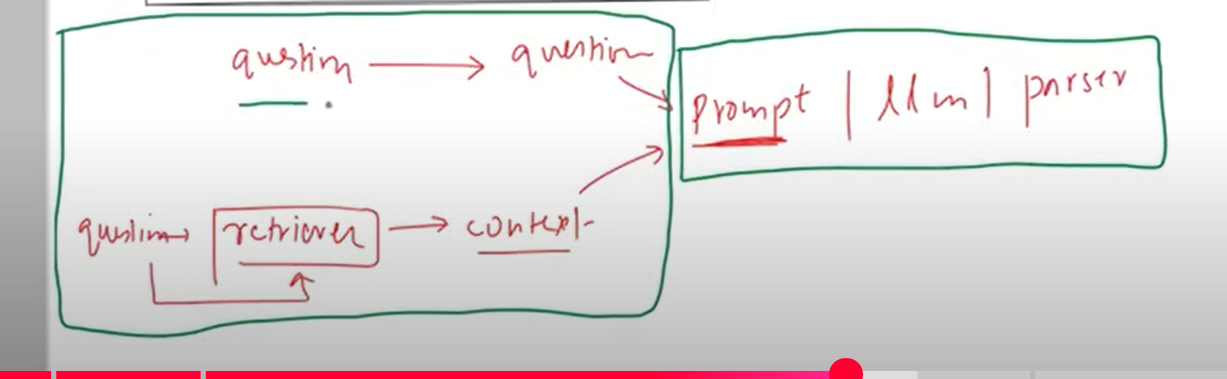

In [50]:
from langchain_core.runnables import RunnableParallel,RunnablePassthrough,RunnableLambda
from langchain_core.output_parsers import StrOutputParser

def format_docs(retriver_docs):
    context = "\n\n".join(docs.page_content for docs in retriver_docs) 
    return context
parallel_Chain = RunnableParallel({
    "context": retriver | RunnableLambda(format_docs),
    "question":RunnablePassthrough()
})

In [56]:
parallel_Chain.invoke("who is Demis")

{'context': "to get world peace because there's also other corrupting things like wanting power over people and this kind of stuff which is not necessarily satisfied by by just abundance but i think it will help um and i think uh but i think ultimately ai is not going to be run by any one person or one organization i think it should belong to the world belong to humanity um and i think maybe many there'll be many ways this will happen and ultimately um everybody should have a say in that do you have advice for uh young people in high school and college maybe um if they're interested in ai or interested in having a big impact on the world what they should do to have a career they can be proud of her to have a life they can be proud of i love giving talks to the next generation what i say to them is actually two things i i think the most important things to learn about and to find out about when you're when you're young is what are your true passions is first of all there's two things on

In [58]:
parser = StrOutputParser()
chain = parallel_Chain | prompt | llm | parser
question = "can u summerize the video"
ans = chain.invoke(question)

In [59]:
print(ans)

The video discusses the evolution of artificial intelligence (AI) and chess, from Claude Shannon's first chess program in 1949 to the recent advancements in the field. The speaker shares their personal experience of being impressed by Garry Kasparov's chess skills, despite being able to play at a similar level to the AI-powered Deep Blue. The conversation also touches on the importance of allowing AI to flow end-to-end and learn without manual constraints, as well as the potential of AI to help us understand and design new tools to explore the vast tree of human knowledge. The speaker also discusses the idea of simulating entire ecosystems, such as the Earth, and the possibility of living in a simulation.


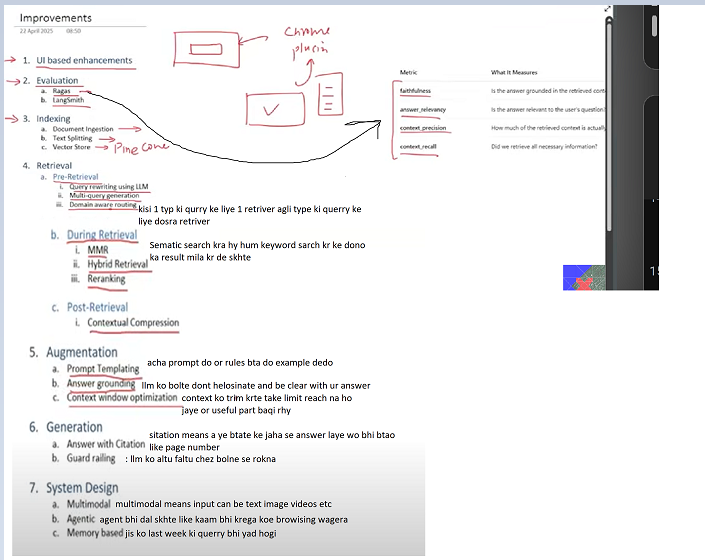